In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def f(X):
    Y = (X - 1.5) ** 2 + 0.5
    print ('X= {}, Y = {}'.format(X, Y))
    return Y

搜索最小值的优化器

In [4]:
Xguess = 2.0 # set guess value
min_result = spo.minimize(f, Xguess, method = 'SLSQP', options = {'disp': True})
# 依次是（函数，猜测值，方法，是否显示详细信息）
print ('X = {}, Y = {}'.format(min_result.x, min_result.fun))

X= [ 2.], Y = [ 0.75]
X= [ 2.], Y = [ 0.75]
X= [ 2.00000001], Y = [ 0.75000001]
X= [ 0.99999999], Y = [ 0.75000001]
X= [ 1.5], Y = [ 0.5]
X= [ 1.5], Y = [ 0.5]
X= [ 1.50000001], Y = [ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
X = [ 1.5], Y = 0.5


X= [ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5], Y = [ 1.5   1.31  1.14  0.99  0.86  0.75  0.66  0.59  0.54  0.51  0.5   0.51
  0.54  0.59  0.66  0.75  0.86  0.99  1.14  1.31  1.5 ]


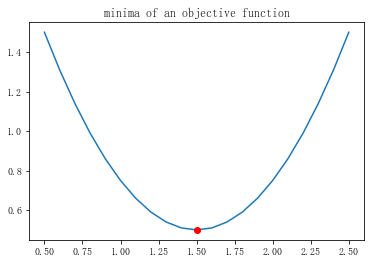

In [5]:
Xplot = np.linspace(0.5, 2.5, 21)
Yplot = f(Xplot)
plt.plot(Xplot, Yplot) 
plt.plot(min_result.x, min_result.fun, 'ro') # 在最小值处set 一个红色的圆
plt.title('minima of an objective function')
plt.show()

上面的方法仅限于找 连续的，单一最小值的，没有平线的minima，还有其他方法可以解决其他多种情况的minima

理解凸函数convex function的概念，任意取两点，两点所连成的直线上方没有graph region，组成的闭合区域。

如何通过优化器找到之前5中得到的拟合直线呢
首先优化器可以用来找最小值，那就想到了最小二乘法，来吧
我们要先找到把什么作为最小值，即方差，如下

In [6]:
def error(line, data):
    # line : tuple/list/array like(C0, C1), C0-slope, C1-intercept
    # data : 2D array where each row is a point(x, y)
    err = np.sum((data[:, 1] - (line[0] * data[:, 0] + line[1])) ** 2)
    return err

In [9]:
l_orig = np.float32([4, 2])
print ('original line: C0 = {}, C1 = {}'.format(l_orig[0],l_orig[1]))

original line: C0 = 4.0, C1 = 2.0


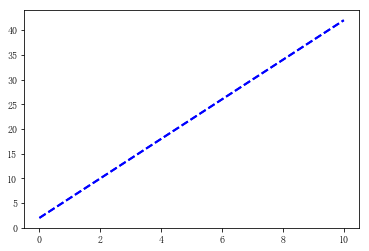

In [12]:
Xorig = np.linspace(0, 10, 21)
Yorig = l_orig[0] * Xorig + l_orig[1]
plt.plot(Xorig, Yorig, 'b--', linewidth = 2.0, label = 'original line')
plt.show()